In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

# Synthetic Data Generation

In [9]:
T = np.linspace(-1,1,2**7)

def b_true(t):
    return math.e**t

# covariate generation
K = np.zeros((2**7,2**7))
for i in range(2**7):
    for j in range(2**7):
        K[i,j]=math.e**(-2*(T[i]-T[j])**2)
        
x = np.random.multivariate_normal(np.zeros(2**7),K,100) 

y = 2*np.dot(x[:,2**6],b_true(1))

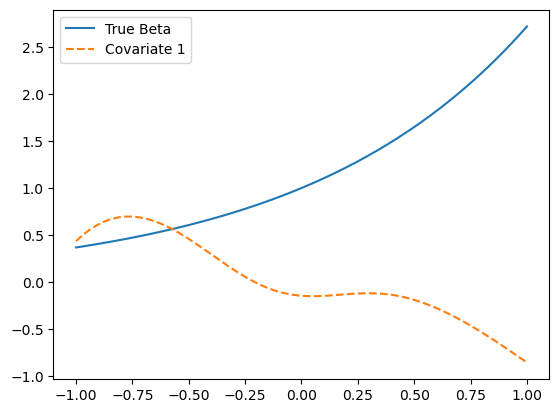

In [10]:
plt.figure()
plt.plot(T,b_true(T),label='True Beta')
plt.plot(T,x[0,:],label='Covariate 1',linestyle='dashed')
plt.legend()
plt.show()

In [11]:
y

array([ -0.79839904,   6.24398335, -11.79506366,   1.29672977,
        -6.16422821,   5.50373424,   4.47239423,   8.45252546,
        -3.74483706,   2.09282558, -12.62581063,  -1.90360766,
        10.09827571,  -3.2595219 ,  10.79125034,  -1.79999485,
        -3.13965455,  -1.04587373,  -0.99352443,   2.22256752,
        -1.34684101,   4.49359336,   4.11494594,  -2.97186718,
         8.43692629,  14.24039329,   8.04243144,   1.71960305,
         6.23024901,  -4.44504508,   0.27697444,   9.29953916,
         5.84624927,   4.4001731 ,   1.7098615 ,  -1.39040169,
         0.48539451,   1.74894082,   9.19303427,  -0.62404289,
         8.08711968,   0.75707189,   7.79890244,   0.50936969,
         2.232499  ,   0.49603393,   1.06827359,  -1.61711214,
        -2.84667838,   1.37666475,  -2.07296007,   5.16747964,
         4.85516318,  -7.0160921 ,  -3.54936287,   7.19232963,
        -2.49389706,   2.8938424 ,   0.36970583,  -6.28977917,
         5.93668793,  -0.24000986,   2.29500857,   0.85

# Posterior of Beta

In [12]:
R = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        R[i,j]=4*K[2**6,2**6]*x[i,2**6]*x[j,2**6]
        
L = np.zeros((100,128))
for i in range(100):
    L[i,:]=2*K[:,2**6]*x[i,2**6]
    
m = np.dot(np.transpose(L),np.linalg.inv(R+10*np.identity(100)))
m = np.dot(m,y)

cov = K - np.dot(np.dot(np.transpose(L),np.linalg.inv(R+10*np.identity(100))),L)

In [22]:
fitted = []
for i in range(100):
    fitted.append(2*np.dot(x[i,2**6],m[2**6]))

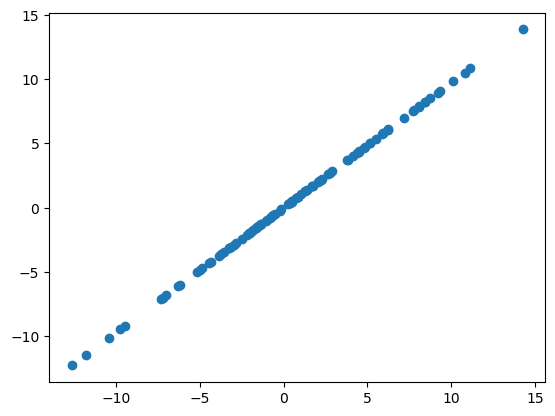

In [24]:
plt.scatter(y,fitted)